# Example: Water discharge data analysis

In [1]:
%load_ext autoreload

%autoreload 2

%matplotlib inline

In [2]:
import requests
import json
from oatlib import sensor, method, oat_utils
from dateutil import parser
import matplotlib.pyplot as plt
from statistics import stdev


Load data from csv using OAT

In [3]:
SENSOR = sensor.Sensor(
    name='procedure_name',
    prop='water-discharge',
    unit='m3/s'
)
SENSOR.ts_from_csv(
    './data/Q_VED_ISO_20180101000000000000.dat',
    qualitycol=2,
    sep=',',
    skiprows=1
)

In [4]:
SENSOR.ts.head(10)

data  quality
time                         
2007-01-02  0.517706      210
2007-01-03  0.508249      210
2007-01-04  0.466232      210
2007-01-05  0.456502      210
2007-01-06  0.441800      210
2007-01-07  0.433471      210
2007-01-08  0.415175      210
2007-01-09  0.412193      210
2007-01-10  0.398600      210
2007-01-11  0.395030      210

Monthly resample using mean() function 

In [5]:
SENSOR_M = SENSOR.copy()
SENSOR_M.ts = SENSOR.ts.resample("M").mean()

Plot monthly Q

In [6]:
SENSOR_M.ts['data'].plot(figsize=(16,5))

## Multi-year monthly means with groupby

First step will be to add another column to our DataFrame with month numbers:

In [7]:
SENSOR.ts['mon'] = SENSOR.ts.index.month

Now we can use [groupby](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) to group our values by months and calculate mean for each of the groups (month in our case):

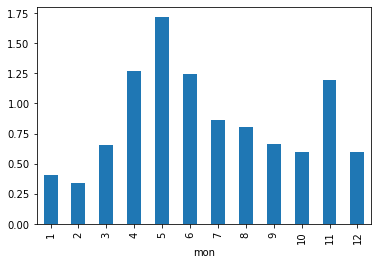

In [8]:
monmean = SENSOR.ts.groupby('mon').aggregate('mean')
monmean['data'].plot(kind='bar')

In order to see what is going on there, it is useful to look at the [box plots](https://en.wikipedia.org/wiki/Box_plot) for every month:

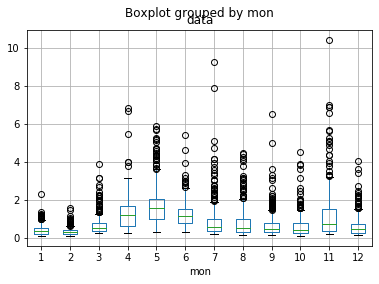

In [9]:
ax = SENSOR.ts.boxplot(column=['data'], by='mon')

In [10]:
method.Statistics().execute(SENSOR)

{'data': {'count': 4017.0,
  'mean': 0.8654590321135176,
  'std': 0.8644015558482258,
  'min': 0.085826,
  '25%': 0.325533,
  '50%': 0.552076,
  '75%': 1.134174,
  'max': 10.420013}}

---

## ASSIGNMENT:
Replicate the Multi-year monthly means with data from W_MAGGGIA from the CSV file W_MAGGIA in istsos folder ;-)